In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
import pyccl.nl_pt as pt

In [2]:
# Try using the Mira-Titan emulator

kmin, kmax, nk = 1e-4, 1e1, 128
k_cemu = np.logspace(np.log10(kmin), np.log10(kmax), nk) # Wavenumber [Mpc]^-1
a = 1. # Scale factor a z=0

In [3]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.05, h=0.67, sigma8=0.8, n_s=0.96, 
                      Neff=3.04, transfer_function='boltzmann_camb')

In [4]:
# Plot linear and nonlinear power spectra
pk_lin_cemu = ccl.linear_matter_power(cosmo, k_cemu, a)

In [5]:

cemu = ccl.CosmicemuMTIVPk("tot")
pk_nl_cemu = ccl.nonlin_matter_power(cosmo, k_cemu, a)

AttributeError: No module named CosmicemuMTIVPk.

NameError: name 'pk_nl_cemu' is not defined

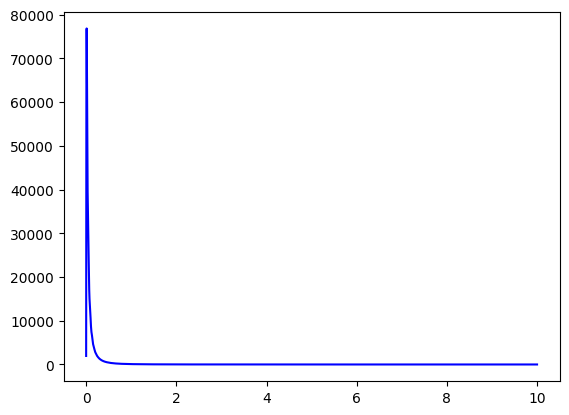

In [6]:
plt.plot(k_cemu, pk_lin_cemu, 'b-', label="linear")
plt.plot(k_cemu, pk_nl_cemu, 'r-', label="non-linear")

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("MiraTitan IV", fontsize=22)

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(k_cemu, pk_nl_cemu/pk_lin_cemu, 'b-', label="linear")
plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('Ratio $P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("MiraTitan IV", fontsize=22)
plt.xlim(10**(-4),10**0)
plt.ylim(0.9,1.1)

plt.tight_layout()
plt.show()

Try using the higher-order perturbation theory case

In [ ]:
pk_lin_cemu = ccl.linear_matter_power(cosmo, k_cemu, a)

# Matter

ptt_m = pt.PTMatterTracer()

In [ ]:
# The `with_NC` and `with_IA` flags will tell FastPT to initialize the right things.
# `log10k_min/max and nk_per_decade will define the sampling in k you should use.
ptc = pt.EulerianPTCalculator(with_NC=True, with_IA=True,
                      log10k_min=-4, log10k_max=2, nk_per_decade=20)

In [ ]:
ptc.update_ingredients(cosmo)

In [ ]:
# Matter x matter
pk_mm = ptc.get_biased_pk2d(ptt_m, tracer2=ptt_m)

In [ ]:
ps = {}
ps['mm'] = pk_mm(k_cemu, 1., cosmo)

In [ ]:
plt.plot(k_cemu, pk_lin_cemu, 'b-', label="linear")
plt.plot(k_cemu, ps['mm'], 'r-', label="non-linear")

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("Fast-Pt", fontsize=22)

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(k_cemu, ps['mm']/pk_lin_cemu, 'b-', label="linear")
plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('Ratio $P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("Fast-PT", fontsize=22)
plt.xlim(10**(-4),10**0)
plt.ylim(0.9,1.1)

plt.tight_layout()
plt.show()

What about halo model?

In [ ]:
# We will use a mass definition with Delta = 200 times the matter density
hmd_200m = ccl.halos.MassDef200m

# The Duffy 2008 concentration-mass relation
cM = ccl.halos.ConcentrationDuffy08(mass_def=hmd_200m)

# The Tinker 2008 mass function
nM = ccl.halos.MassFuncTinker08(mass_def=hmd_200m)

# The Tinker 2010 halo bias
bM = ccl.halos.HaloBiasTinker10(mass_def=hmd_200m)

# The NFW profile to characterize the matter density around halos
pM = ccl.halos.HaloProfileNFW(mass_def=hmd_200m, concentration=cM, fourier_analytic=True)

In [ ]:
hmc = ccl.halos.HMCalculator(mass_function=nM, halo_bias=bM, mass_def=hmd_200m)

In [ ]:
pk_MM = ccl.halos.halomod_power_spectrum(cosmo, hmc, k_cemu, 1., pM)

In [ ]:
plt.plot(k_cemu, pk_lin_cemu, 'b-', label="linear")
plt.plot(k_cemu, pk_MM, 'r-', label="non-linear")

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("Halomodel", fontsize=22)

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(k_cemu, pk_MM/pk_lin_cemu, 'b-', label="linear")
plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('Ratio $P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("Halo Model ", fontsize=22)
plt.xlim(10**(-4),10**0)
plt.ylim(0.9,1.1)

plt.tight_layout()
plt.show()

Use HMCode2020 directly through CAMB.

In [ ]:
ccl_cosmo_HMCode = ccl.Cosmology(
    Omega_c=0.27, Omega_b=0.05, h=0.67, sigma8=0.8, n_s=0.96, Neff=3.04,
    transfer_function="boltzmann_camb",
    matter_power_spectrum="camb",
    extra_parameters={"camb":
         {"halofit_version": "mead2020",
         }})

pk_nonlin_ccl = ccl.nonlin_matter_power(ccl_cosmo_HMCode, k_cemu, 1.0)

In [ ]:
plt.plot(k_cemu, pk_lin_cemu, 'b-', label="linear")
plt.plot(k_cemu, pk_nonlin_ccl, 'r-', label="non-linear")

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("HMCode via camb", fontsize=22)

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(k_cemu, pk_nonlin_ccl/pk_lin_cemu, 'b-', label="linear")
plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('Ratio $P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("Halo Model ", fontsize=22)
plt.xlim(10**(-4),10**0)
plt.ylim(0.9,1.1)

plt.tight_layout()
plt.show()